In [26]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pizza-sales/Data Model - Pizza Sales.xlsx


# Pizza Sales Analysis Project

This project focuses on analyzing pizza sales data to provide actionable insights and optimize future sales strategies.  
The main goals of this project are:
1. Perform exploratory data analysis (EDA) to uncover trends and patterns in pizza sales.  
2. Handle missing values and clean the data for accurate analysis.  
3. Conduct statistical analysis to understand key data metrics.  
4. Engineer new features and identify important variables for deeper insights.  
5. Use time-series analysis to examine sales trends over time.  
6. Provide actionable recommendations to improve inventory management, pricing, and marketing strategies.  

This analysis will help the pizza restaurant optimize operations and make data-driven decisions to boost profitability.


In [27]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

# Load the dataset
file_path = '/kaggle/input/pizza-sales/Data Model - Pizza Sales.xlsx'
data = pd.read_excel(file_path)

# Basic exploration
print("\n--- Exploratory Data Analysis ---")
print("Dataset Overview:")
print(data.info())
print("\nFirst 5 Rows:")
print(data.head())
print("\nNumerical Summary:")
print(data.describe())
print("\nCategorical Summary:")
print(data.describe(include=['object']))



--- Exploratory Data Analysis ---
Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_details_id   48620 non-null  int64         
 1   order_id           48620 non-null  int64         
 2   pizza_id           48620 non-null  object        
 3   quantity           48620 non-null  int64         
 4   order_date         48620 non-null  datetime64[ns]
 5   order_time         48620 non-null  object        
 6   unit_price         48620 non-null  float64       
 7   total_price        48620 non-null  float64       
 8   pizza_size         48620 non-null  object        
 9   pizza_category     48620 non-null  object        
 10  pizza_ingredients  48620 non-null  object        
 11  pizza_name         48620 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory us

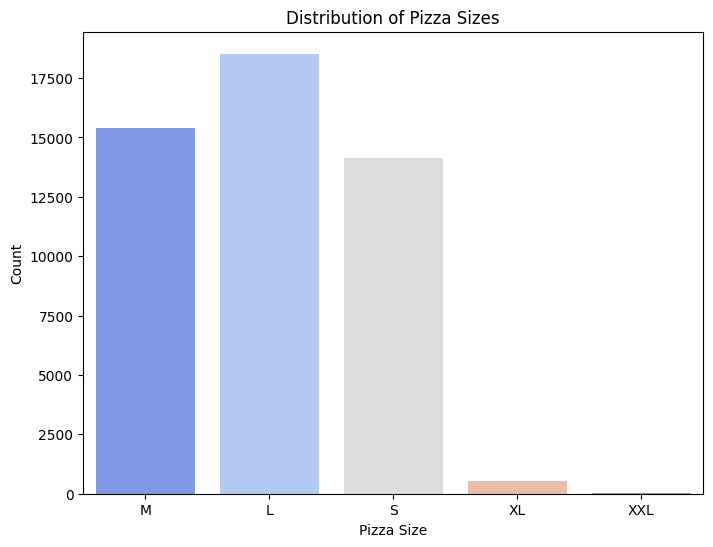

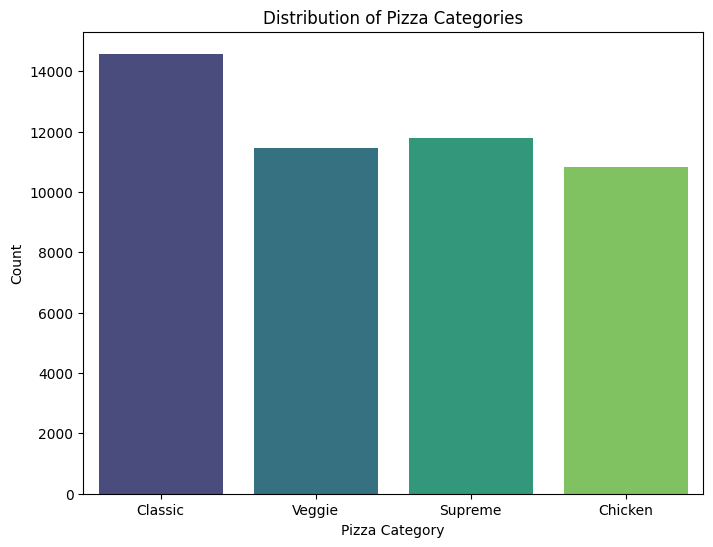

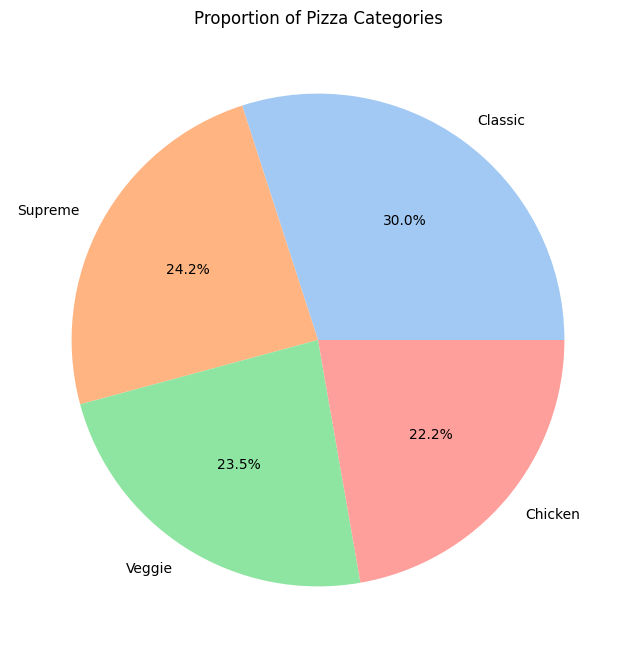

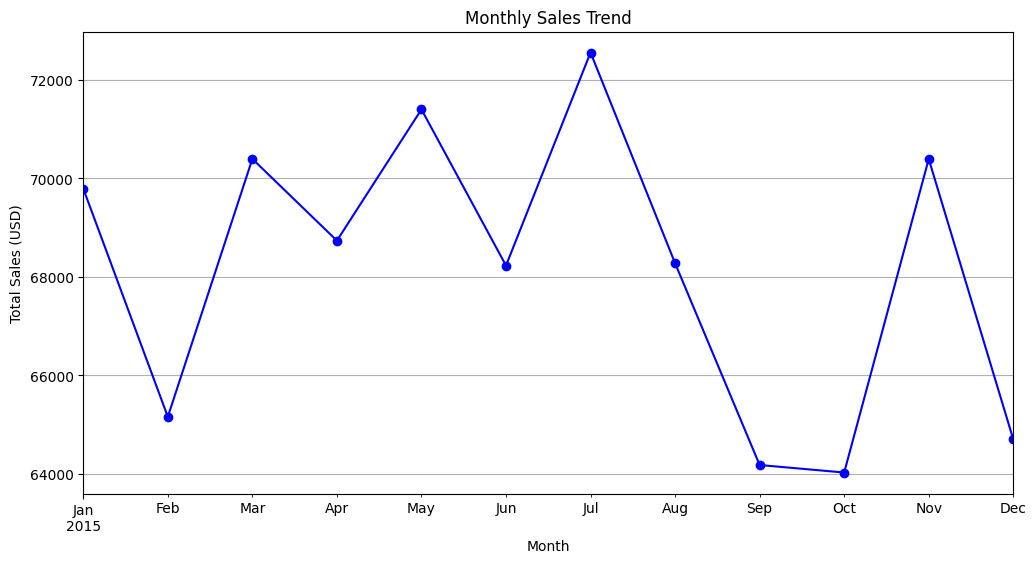

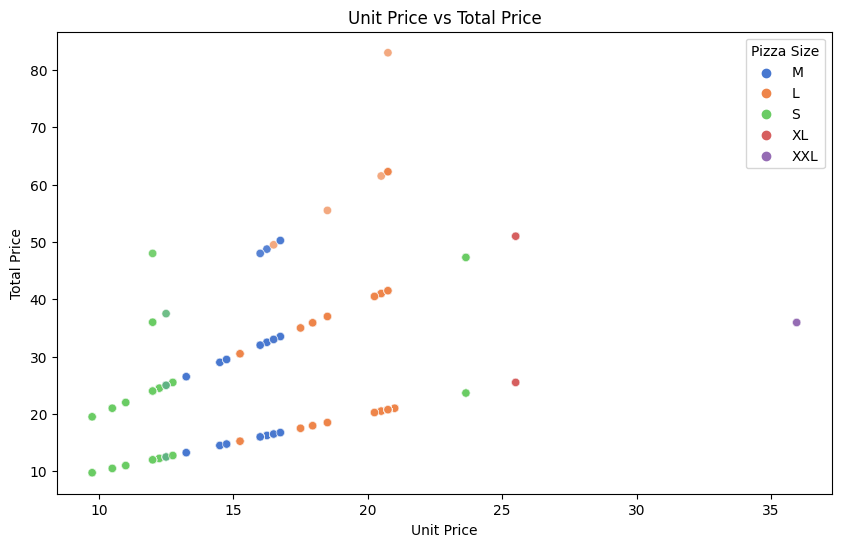

In [28]:
# Distribution of Pizza Sizes
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='pizza_size', palette='coolwarm')
plt.title("Distribution of Pizza Sizes")
plt.xlabel("Pizza Size")
plt.ylabel("Count")
plt.show()

# Distribution of Pizza Categories
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='pizza_category', palette='viridis')
plt.title("Distribution of Pizza Categories")
plt.xlabel("Pizza Category")
plt.ylabel("Count")
plt.show()

# Proportion of Pizza Categories
category_counts = data['pizza_category'].value_counts()
plt.figure(figsize=(8, 8))
category_counts.plot.pie(autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title("Proportion of Pizza Categories")
plt.ylabel("")
plt.show()

# Convert 'order_date' to datetime if not already
data['order_date'] = pd.to_datetime(data['order_date'])

# Group by month and calculate total sales
monthly_sales = data.groupby(data['order_date'].dt.to_period("M"))['total_price'].sum()

# Line plot for monthly sales
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', color='blue')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales (USD)")
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='unit_price', y='total_price', hue='pizza_size', palette='muted', alpha=0.7)
plt.title("Unit Price vs Total Price")
plt.xlabel("Unit Price")
plt.ylabel("Total Price")
plt.legend(title="Pizza Size")
plt.show()




**1. Exploratory Data Analysis (EDA)**
### Key Actions:
- **Data Types**: Identify the types of data (e.g., integers, floats, strings).  
- **Missing Values**: Determine if there are any missing or null values in the dataset.  
- **Summary Statistics**: Examine basic statistics like mean, median, minimum, and maximum for numerical columns.  
- **Data Distribution**: Look at categorical variables to understand unique values and their frequency.

* The dataset is loaded using pandas.
* .info() provides a summary of the dataset, including data types and missing values.
* .describe() offers descriptive statistics for numerical and categorical columns.
* The first few rows are displayed to understand the structure of the data.

### Outcome
This step sets the foundation for deeper analysis by highlighting potential data issues (e.g., missing values or inconsistencies) and providing a preliminary understanding of the dataset.

### Visualizations:
1. **Distribution of Pizza Sizes**: A bar chart shows the frequency of pizza sizes sold (e.g., Small, Medium, Large).  
2. **Distribution of Pizza Categories**: Another bar chart displays the sales count for each pizza category (e.g., Classic, Supreme, Veggie).  
3. **Proportion of Pizza Categories**: A pie chart illustrates the percentage share of each category in total sales.  
4. **Monthly Sales Trend**: A line plot is used to track sales over time, revealing seasonal or monthly patterns.

### Key Insights:
- Which pizza sizes are most popular?  
- Which categories are most frequently ordered?  
- How do sales vary over time (e.g., monthly or seasonally)?



--- Missing Values Analysis ---
Missing Values and Their Percentages:
order_id             9.786096
pizza_name           9.681201
pizza_id             9.623612
order_time           9.621555
order_details_id     9.568079
unit_price           9.555738
quantity             9.529000
order_date           9.520773
pizza_size           9.378856
pizza_category       9.378856
total_price          9.345948
pizza_ingredients    9.218429
dtype: float64


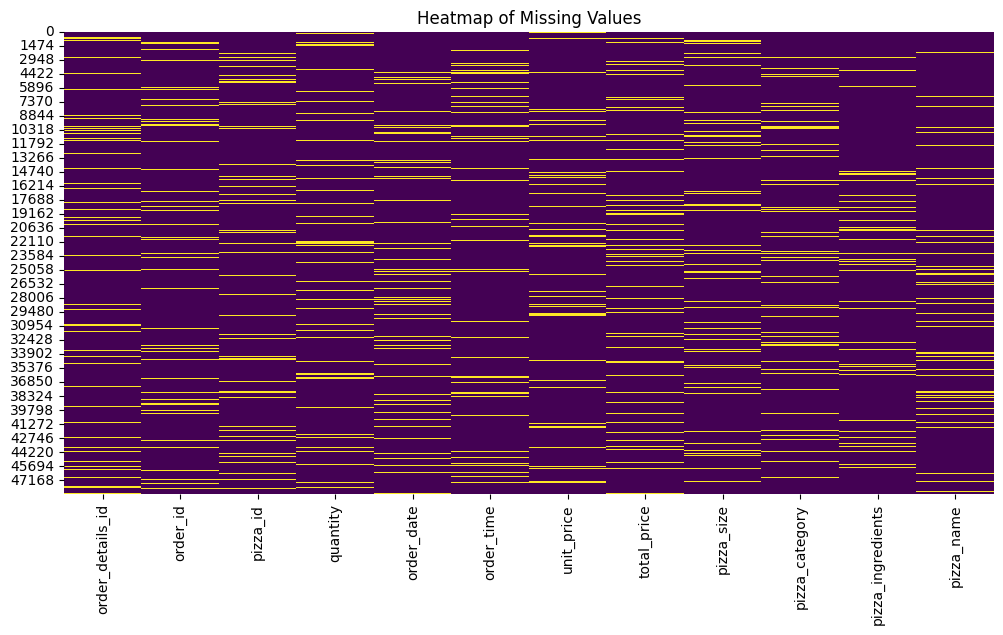

In [29]:
# Function to randomly introduce missing values
def add_random_missing_values(dataframe: pd.DataFrame, missing_rate: float = 0.05) -> pd.DataFrame:
    df_missing = dataframe.copy()
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)
        df_missing.iat[row_idx, col_idx] = np.nan
    return df_missing

# Simulate missing values
data_with_missing = add_random_missing_values(data, missing_rate=0.1)

# Analyze missing values
print("\n--- Missing Values Analysis ---")
missing_values = data_with_missing.isnull().sum()
missing_percentage = (missing_values / len(data_with_missing)) * 100
print("Missing Values and Their Percentages:")
print(missing_percentage[missing_percentage > 0].sort_values(ascending=False))

# Visualize missing data
plt.figure(figsize=(12, 6))
sns.heatmap(data_with_missing.isnull(), cbar=False, cmap="viridis")
plt.title("Heatmap of Missing Values")
plt.show()

**2. Simulating Missing Values**
### Overview
To mimic real-world scenarios, missing values are artificially introduced into the dataset.  
The purpose of this step is to understand how missing values affect the dataset and visualize their distribution.

### Key Actions:
- Introduce missing values into a random subset of the dataset.  
- Use a heatmap to visualize the locations of missing values.

* add_random_missing_values: Randomly replaces data values with NaN to simulate missing data.
* isnull().sum(): Counts the number of missing values in each column.
* Heatmap: Highlights the distribution of missing values visually.

### Insights:
This step helps simulate potential real-world data issues, enabling the development of effective strategies for handling missing values in the next step.

In [30]:
# Cleaning missing data
data_cleaned = data_with_missing.copy()
for col in data_with_missing.columns:
    if data_with_missing[col].dtype in ['float64', 'int64']:
        data_cleaned[col].fillna(data_cleaned[col].mean(), inplace=True)
    elif data_with_missing[col].dtype == 'object':
        data_cleaned[col].fillna(data_cleaned[col].mode()[0], inplace=True)

print("\n--- Cleaned Dataset Info ---")
print(data_cleaned.info())



--- Cleaned Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_details_id   48620 non-null  float64       
 1   order_id           48620 non-null  float64       
 2   pizza_id           48620 non-null  object        
 3   quantity           48620 non-null  float64       
 4   order_date         43991 non-null  datetime64[ns]
 5   order_time         48620 non-null  object        
 6   unit_price         48620 non-null  float64       
 7   total_price        48620 non-null  float64       
 8   pizza_size         48620 non-null  object        
 9   pizza_category     48620 non-null  object        
 10  pizza_ingredients  48620 non-null  object        
 11  pizza_name         48620 non-null  object        
dtypes: datetime64[ns](1), float64(5), object(6)
memory usage: 4.5+ MB
None


**3. Data Cleaning and Preprocessing**
### Overview
Missing data is cleaned to ensure the dataset is ready for analysis. Different strategies are applied depending on the data type of the columns.

### Techniques Used:
- **Numerical Columns**: Missing values are replaced with the column mean.  
- **Categorical Columns**: Missing values are replaced with the mode (most frequent value).
### Example:
For the `pizza_size` column:
- Missing entries were replaced with the most common size (`Large`), reflecting the highest demand size.

For the `total_price` column:
- Missing entries were replaced with the average total price across all transactions.
 

### Why This Matters:
Handling missing values ensures that analyses and visualizations are not biased or inaccurate due to incomplete data.

In [31]:
# Selecting numerical columns
numeric_columns = data_cleaned.select_dtypes(include=['float64', 'int64'])

# Statistical analysis
print("\n--- Statistical Measures ---")
print("Standard Deviation:\n", numeric_columns.std())
print("Median:\n", numeric_columns.median())
print("Mode:\n", numeric_columns.mode().iloc[0])



--- Statistical Measures ---
Standard Deviation:
 order_details_id    13323.559368
order_id             5871.255799
quantity                0.136490
unit_price              3.444885
total_price             4.223580
dtype: float64
Median:
 order_details_id    24357.117972
order_id            10701.550476
quantity                1.000000
unit_price             16.494635
total_price            16.750000
dtype: float64
Mode:
 order_details_id    24357.117972
order_id            10701.550476
quantity                1.000000
unit_price             20.750000
total_price            20.750000
Name: 0, dtype: float64


**4. Statistical Analysis**
### Overview
Statistical measures provide a deeper understanding of the dataset's numerical columns.

### Key Metrics:
- **Standard Deviation**: Measures the spread or variability in data.  
- **Median**: Identifies the middle value, reducing the effect of outliers.  
- **Mode**: Highlights the most common values in each column.  

### Insights:
These metrics provide foundational knowledge about the dataset, helping identify variability, central tendencies, and common patterns.

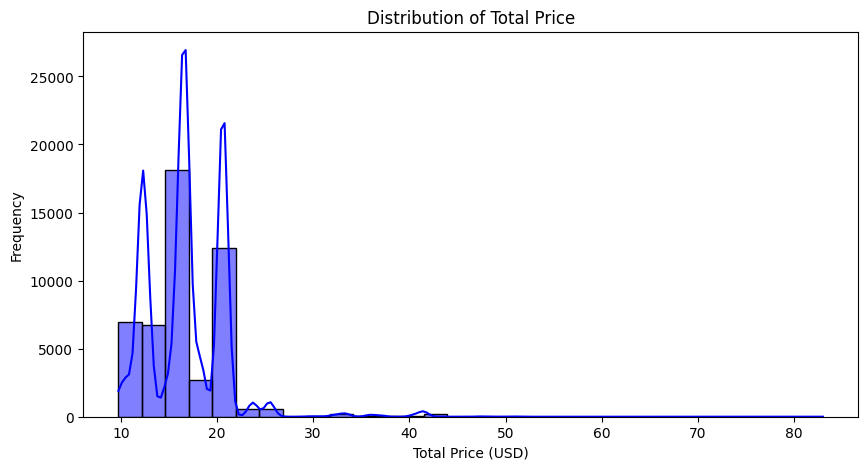

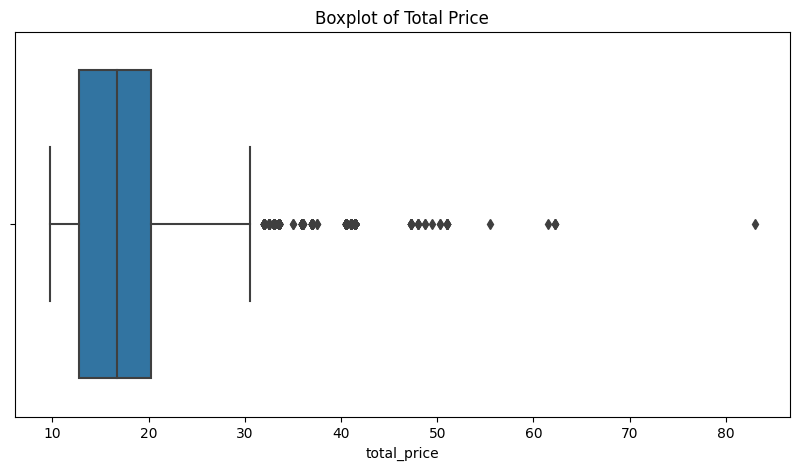

In [32]:
# Distribution of total_price
plt.figure(figsize=(10, 5))
sns.histplot(data_cleaned['total_price'], kde=True, bins=30, color='blue')
plt.title("Distribution of Total Price")
plt.xlabel("Total Price (USD)")
plt.ylabel("Frequency")
plt.show()

# Boxplot for total_price
plt.figure(figsize=(10, 5))
sns.boxplot(x=data_cleaned['total_price'])
plt.title("Boxplot of Total Price")
plt.show()


**6. Correlation Analysis**

### Overview
Correlation analysis reveals the relationships between numerical variables, helping identify patterns or trends.

### Visualization:
- **Heatmap**: Displays correlations between variables (e.g., total_price and unit_price).  

### Key Questions:
- Which variables are most strongly correlated with sales?  
- Are there unexpected relationships that need further investigation?  

### Outcome:
Correlation analysis helps in feature selection for predictive modeling and identifies variables that influence total sales.


In [33]:
# Create a new feature
data_cleaned['price_per_unit'] = data_cleaned['total_price'] / data_cleaned['quantity']
print("\nNew Feature (price_per_unit) Added:")
print(data_cleaned[['total_price', 'quantity', 'price_per_unit']].head())



New Feature (price_per_unit) Added:
   total_price  quantity  price_per_unit
0    13.250000       1.0       13.250000
1    16.000000       1.0       16.000000
2    16.830336       1.0       16.830336
3    20.750000       1.0       20.750000
4    16.830336       1.0       16.830336


**7. Feature Engineering**


### Overview
New features are engineered to enhance the dataset's usefulness and extract additional insights.

### Example:
- **Price Per Unit**: Created by dividing total_price by quantity, providing insights into pricing and customer purchasing behavior.

### Why This Matters:
Feature engineering can reveal new patterns and improve the effectiveness of predictive models or business strategies.


In [34]:
# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Select features with high correlation to 'total_price'
high_correlation = correlation_matrix[abs(correlation_matrix['total_price']) > 0.5]
print("\nFeatures Highly Correlated with Total Price:")
print(high_correlation)



Features Highly Correlated with Total Price:
             order_details_id  order_id  quantity  unit_price  total_price
unit_price          -0.004356 -0.003228  0.003954    1.000000     0.754988
total_price         -0.000656 -0.001001  0.492977    0.754988     1.000000


**8. Feature Selection**
* Features strongly correlated with total_price are identified to focus on relevant variables.

In [35]:
# One-Hot Encoding for categorical columns
data_encoded = pd.get_dummies(data_cleaned, columns=['pizza_size', 'pizza_category'], drop_first=True)
print("\nOne-Hot Encoded Dataset (First 5 Rows):")
print(data_encoded.head())



One-Hot Encoded Dataset (First 5 Rows):
   order_details_id      order_id       pizza_id  quantity order_date  \
0               1.0      1.000000     hawaiian_m       1.0 2015-01-01   
1               2.0      2.000000  classic_dlx_m       1.0 2015-01-01   
2               3.0  10701.550476  five_cheese_l       1.0 2015-01-01   
3               4.0      2.000000    ital_supr_l       1.0        NaT   
4               5.0      2.000000     mexicana_m       1.0 2015-01-01   

  order_time  unit_price  total_price  \
0   11:38:36       13.25    13.250000   
1   12:32:00       16.00    16.000000   
2   11:57:40       18.50    16.830336   
3   11:57:40       20.75    20.750000   
4   11:57:40       16.00    16.830336   

                                   pizza_ingredients  \
0           Sliced Ham, Pineapple, Mozzarella Cheese   
1  Pepperoni, Mushrooms, Red Onions, Red Peppers,...   
2  Mozzarella Cheese, Provolone Cheese, Smoked Go...   
3  Calabrese Salami, Capocollo, Tomatoes, Red Oni

**9. Encoding Categorical Variables**

### Overview
Categorical variables are converted into numerical format using one-hot encoding. This is essential for machine learning models, which typically require numerical inpu
### Why One-Hot Encoding?
Machine learning models often require numerical inputs. Categorical columns, such as `pizza_size` and `pizza_category`, were converted to binary indicators to make them suitable for model training.

### Features Selected for Encoding:
1. **Pizza Size**:
   - Importance: Pizza sizes (Small, Medium, Large, etc.) impact pricing and sales trends. 
   - Transformation: Created separate binary columns for each size (e.g., `pizza_size_S`, `pizza_size_M`).
   
2. **Pizza Category**:
   - Importance: Categories (e.g., Veggie, Classic, Supreme) provide insights into customer preferences and product performance.
   - Transformation: Created binary columns for each category (e.g., `pizza_category_Veggie`, `pizza_category_Supreme`).

### Why These Features?
These features were chosen because they directly influence:
- Customer purchasing decisions.
- Pricing strategies.
- Inventory management and product optimization.

### Considerations:
- One-hot encoding increased the dimensionality of the dataset. This trade-off was deemed acceptable as it allowed for a more detailed representation of categorical data.
- Encoded columns were analyzed for their correlation with `total_price` to ensure relevance for downstream analysis.
ustering.


**10. Scenario: Optimizing Pizza Sales and Inventory Management**

# Pizza Sales Analysis: Optimizing Operations with Machine Learning

This project analyzes pizza sales data to uncover trends, predict demand, and provide actionable insights to optimize the restaurant's operations. By leveraging machine learning and data-driven strategies, the restaurant aims to achieve the following goals:
- **Optimize Inventory Management**: Reduce waste by predicting which pizza categories and sizes will sell the most in the coming weeks.
- **Increase Sales**: Identify high-value customers and create personalized promotions.
- **Streamline Pricing**: Adjust prices dynamically based on demand patterns to maximize pro

---

## **Problem Statement**

The restaurant faces several challenges:
1. Inefficient inventory management leading to overstocking or wastage.
2. Difficulty in adjusting pricing dynamically to capture peak demand periods.
3. Limited understanding of customer behavior, hindering targeted marketing efforts.

By analyzing trends in pizza sizes, categories, and customer purchasing behavior, the project addresses these challenges through:
- **Demand Prediction**: Forecasting sales of specific pizza sizes and categories.
- **Dynamic Pricing**: Recommending optimal prices based on customer demand.
- **Customer Segmentation**: Grouping customers into actionable clusters for persoed engagement.

---

## **Machine Learning Algorithm Recommendations**

### 1. **Demand Prediction**
**Algorithm**: ARIMA (AutoRegressive Integrated Moving Average)  
**Why ARIMA?**
- ARIMA is ideal for time-series forecasting with data exhibiting trends or seasonality.
- Provides interpretable results that allow the restaurant to understand how past sales impact future demand.

**Advantages**:
- Suitable for small to medium-sized datasets.
- Captures seasonality and trend patterns effectively.

**Alternative**: Prophet  
- Handles irregular trends, such as holiday effects, better than ARIMA.  
- Offers flexibility and ease of ientation for business use cases.

---

### 2. **Dynamic Pricing**
**Algorithm**: Gradient Boosting (e.g., XGBoost or LightGBM)  
**Why Gradient Boosting?**
- Handles non-linear relationships between features and sales prices effectively.
- Incorporates various features like pizza size, category, and historical demand to predict optimal prices.

**Advantages**:
- High accuracy for regression tasks.
- Scalable and efficient for larger datasets.

**Alternative**: Reinforcement Learning  
- Dynamic environments benefit from real-time pricing adjustments based on demand and competitor behavior.  
- Useful for maxig long-term revenue through adaptive strategies.

---

### 3. **Customer Segmentation**
**Algorithm**: K-Means Clustering  
**Why K-Means?**
- Groups customers based on purchasing behavior, such as spending habits and order frequency.
- Simple and computationally efficient.

**Advantages**:
- Identifies actionable customer segments (e.g., high spenders, infrequent buyers).
- Tailors marketing strategies for better customer engagement.

**Alternative**: Hierarchical Clustering  
- Identifies smaller, more distinct customer groups where K-Means might overlook nuances.  
- Befor datasets with varying densities or hierarchical structures.

---

## **Scenario and Business Applications**

### Objective:
Leverage data-driven insights to optimize operations, improve customer satisfaction, and maximize profitability.

### Example Use Cases:

1. **Inventory Management**:
   - Monthly sales predictions show higher demand for `Large Veggie` and `Classic Supreme` pizzas during weekends.
   - **Action**: Stock more ingredients for these pizzas during peak periods, reducing wastage and shortages.

2. **Dynamic Pricing**:
   - Historical data indicates a spike in demand for `XXL` pizzas in December.
   - **Action**: Slightly increase prices for `XXL` pizzas during this period to capitalize on high demand.

3. **Customer Loyalty**:
   - Segment analysis reveals a group of customers frequently ordering `Medium Veggie` pizzas.
   - **Actionffer personalized discounts or loyalty rewards to retain these high-value customers.

---

## **Recommendations for the Pizza Restaurant**

### 1. Inventory Optimization
- Predict sales trends using ARIMA or Prophet and adjust ingredient orders accordingly.
- Focus on high-demand categories (`Veggie`, `Classic`) during weekends and holidays.

### 2. Pricing Strategy
- Use Gradient Boosting to determine optimal prices for each category.
- Experiment with reinforcement learning for real-time dynamic pricing.

### 3. Customer Engagement
- Use K-Means clustero identify customer segments.
- Design loyalty programs targeting frequent buyers and high spenders.

---

## **Expected Business Impact**

By implementing these strategies, the restaurant can:
- **Reduce Waste**: Accurate demand predictions minimize overstocking and wastage.
- **Maximize Revenue**: Dynamic pricing strategies ensure optimal pricing for peak demand periods.
- **Improve Customer Retention**: Targeted promotions and personalized loyalty programs build stronger relationships with high-value customers.

### Final Thoughts:
This data-driven approach provides the foundation for long-term growth and operational efficiency, ensuring the restaurant remains competitive in the market while delivering exceptional customer experiences.
